## Bayesian Hierarchical Clustering (Pavleen Kaur-873230233)

Three cases have been explored:

## Case 1: 

Data containing same values for a particular class


## Case 2:

Data generated using normal distribution with mean=100 and varying standard deviations:

The data contains 7 time series/rows generated as normal distributions from same mean and different standard deviations with 5 column values in each row. We can consider these 5 columns as feature values. Row 1 and 2 are generated using rnorm(mean=100,sd=15). Row 3,4,5 are generated using rnorm(mean=100,sd=25). Row 6 is generated using rnorm(mean=100,sd=42) and row 7 is generated using (mean=100,sd=50).

So we already know that data should be clustered into four clusters with row 1 and 2 being cluster 1, row 3,4,5 being cluster 2 and row 6 and row 7 as separate clusters. We also insert data without and with class column where each cluster is represented by numbers 1,2,3 and 4.


## Case 3:
Data generated using different distributions (normal, poisson,gaussian and beta distributions)

The data has 6 rows or time series generated from different distributions. Here row 1 is a time series with 30 instance values drawn from normal distribution. Row 2 is a time series of 30 instances drawn from poisson distribution, Row 3 is a time series from gamma distribution and row 4,5 and 6 are drawn from beta distributions with
x<-rbeta(N,5,2)
y<-rbeta(N,2,5)
z<-rbeta(N,5,5)

So we should have 6 separate clusters here.





In [1]:
#Downloading BHC package

if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install(version = "3.12")

Bioconductor version 3.12 (BiocManager 1.30.10), R 4.0.3 (2020-10-10)



In [2]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install()

Bioconductor version 3.12 (BiocManager 1.30.10), R 4.0.3 (2020-10-10)



In [7]:
install.packages("argparse")

Installing package into 'C:/Users/pavle/OneDrive/Documents/R/win-library/4.0'
(as 'lib' is unspecified)

also installing the dependency 'findpython'




package 'findpython' successfully unpacked and MD5 sums checked
package 'argparse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pavle\AppData\Local\Temp\RtmpWSqRiJ\downloaded_packages


In [3]:
#list of all libraries needed for the code

library(BHC)
library(argparse)
library(RColorBrewer)
library(BHC)
library(parallel)


## Case 1

In [5]:

data         <- matrix(0,15,10)
itemLabels   <- vector("character",15)
data[1:5,]   <- 1 ; itemLabels[1:5]   <- "a"
data[6:10,]  <- 2 ; itemLabels[6:10]  <- "b"
data[11:15,] <- 3 ; itemLabels[11:15] <- "c"


##DATA DIMENSIONS
nDataItems <- nrow(data)
nFeatures  <- ncol(data)

##RUN MULTINOMIAL CLUSTERING
hc1 <- bhc(data, itemLabels, verbose=TRUE)



[1] Running Bayesian Hierarchical Clustering....
[1] "DataType: multinomial"
[1] Optimising global hyperparameter...
[1]   0.7642338 -88.7830929
[1]   1.236254 -99.514068
[1]   0.4309005 -79.1391819
[1]   0.4309005 -79.1391819
[1]   0.4309005 -79.1391819
[1] Hyperparameter: 0.430900452187475
[1] Lower bound on overall LogEvidence: -7.9139e+01
[1] *******************


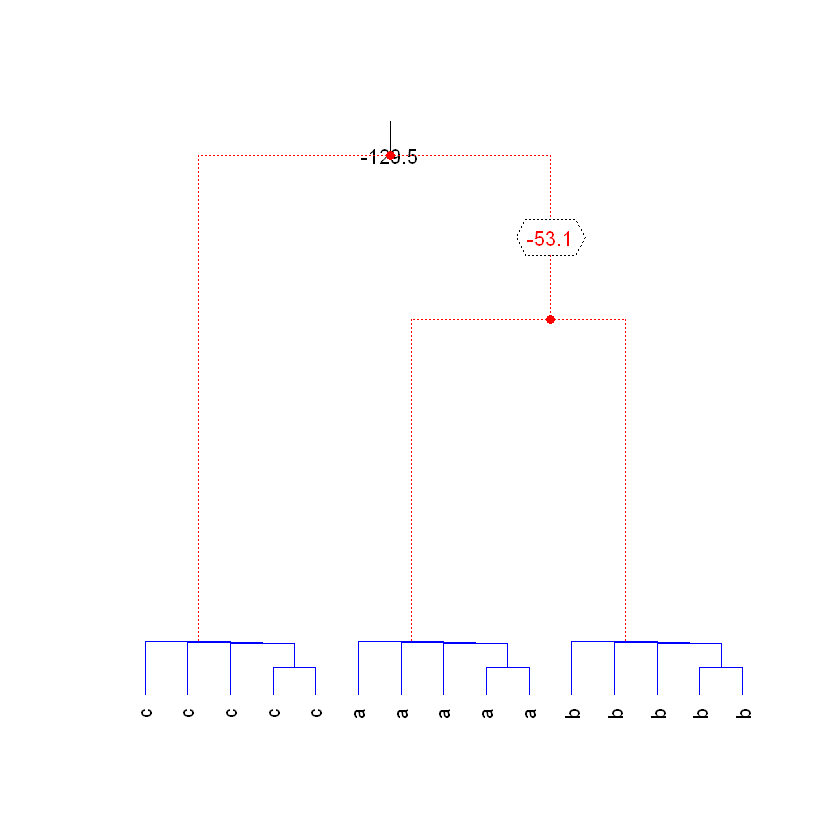

In [6]:
#Dendogram plot
plot(hc1, axes=FALSE)

In [7]:
#write out clusters
WriteOutClusterLabels(hc1, 'case1.txt', verbose=TRUE)

[1] ---CLUSTER 1 ---
[1] c
[1] c
[1] c
[1] c
[1] c
[1] ---CLUSTER 2 ---
[1] a
[1] a
[1] a
[1] a
[1] a
[1] ---CLUSTER 3 ---
[1] b
[1] b
[1] b
[1] b
[1] b


## Case 2

In [26]:
# Generating normal distributions with different standard deviations

set.seed(100)
N<-20
L1<-rnorm(n=N,mean=100,sd=15)
L2<-rnorm(n=N,mean=100,sd=15)
L3<-rnorm(n=N,mean=100,sd=25)
L4<-rnorm(n=N,mean=100,sd=25)
L5<-rnorm(n=N,mean=100,sd=25)
L6<-rnorm(n=N,mean=100,sd=42)
L7<-rnorm(n=N,mean=100,sd=50)
L1
L2
L3
L4
L5
L6
L7
L1<-round(L1,2)
L2<-round(L2,2)
L3<-round(L3,2)
L4<-round(L4,2)
L5<-round(L5,2)
L6<-round(L6,2)
L7<-round(L7,2)
L1
L2
L3
L4
L5
L6
L7

[1]  92.46711 101.97297  98.81624 113.30177 101.75457 104.77945  91.27314
 [8] 110.71799  87.62111  94.60207 101.34829 101.44412  96.97549 111.09761
[15] 101.85069  99.56025  94.16719 107.66284  86.29279 134.65445

[1]  93.42865 111.46091 103.92942 111.60107  87.78431  93.42324  89.19668
 [8] 103.46417  82.63406 103.70614  98.63330 126.36063  97.93106  98.33210
[15]  89.64979  96.67309 102.74362 106.25985 115.98103 114.55303

[1]  97.45927 135.08009  55.58061 115.57168  86.94292 133.05577  90.91399
 [8] 132.97664 101.09448  53.03360  88.82345  56.53505 104.47162 147.43664
[15]  43.20186 124.51160  65.02936 145.62181 134.53247  79.02870

[1]  93.45011  98.27890  90.52791 164.54897 103.24585  82.17438 115.94986
 [8] 105.04229  98.25208  97.68775 111.22258  73.39111  70.93952 141.21304
[15]  48.44760 100.31874  72.81179 106.76349 125.21130  48.13988

[1] 122.42056  98.75011  66.36627  51.71971 117.73954  96.05237 105.40920
 [8] 120.43405 143.17939  97.40574  86.07194 135.70754  77.67606  71.06072
[15]  86.74259 161.14207  79.18761 110.33800  70.53292  70.64913

[1]  86.01722 157.25078  80.29581 135.40078  38.76426  83.18715  67.39047
 [8]  84.48955 152.08426  95.48778 107.24893 110.69325  74.18958  39.97297
[15]  86.09903 105.39221 142.76104  89.26590  87.29328 167.83801

[1]  61.31433 121.20012  70.80265 120.75178  22.73692  74.06252  86.01042
 [8] 150.37287  76.52150 114.89485  79.11028  57.48096 134.45231  76.99019
[15] 167.40922 122.15357  92.45369 122.77744  97.99227 122.80605

[1]  92.47 101.97  98.82 113.30 101.75 104.78  91.27 110.72  87.62  94.60
[11] 101.35 101.44  96.98 111.10 101.85  99.56  94.17 107.66  86.29 134.65

[1]  93.43 111.46 103.93 111.60  87.78  93.42  89.20 103.46  82.63 103.71
[11]  98.63 126.36  97.93  98.33  89.65  96.67 102.74 106.26 115.98 114.55

[1]  97.46 135.08  55.58 115.57  86.94 133.06  90.91 132.98 101.09  53.03
[11]  88.82  56.54 104.47 147.44  43.20 124.51  65.03 145.62 134.53  79.03

[1]  93.45  98.28  90.53 164.55 103.25  82.17 115.95 105.04  98.25  97.69
[11] 111.22  73.39  70.94 141.21  48.45 100.32  72.81 106.76 125.21  48.14

[1] 122.42  98.75  66.37  51.72 117.74  96.05 105.41 120.43 143.18  97.41
[11]  86.07 135.71  77.68  71.06  86.74 161.14  79.19 110.34  70.53  70.65

[1]  86.02 157.25  80.30 135.40  38.76  83.19  67.39  84.49 152.08  95.49
[11] 107.25 110.69  74.19  39.97  86.10 105.39 142.76  89.27  87.29 167.84

[1]  61.31 121.20  70.80 120.75  22.74  74.06  86.01 150.37  76.52 114.89
[11]  79.11  57.48 134.45  76.99 167.41 122.15  92.45 122.78  97.99 122.81

In [27]:
# clubbing data generated into a matrix

data         <- matrix(0,7,20)
itemLabels   <- vector("character",4)
data[1,]   <- L1 ; itemLabels[1]   <- "L1"
data[2,]  <- L2 ; itemLabels[2]  <- "L1"
data[3,] <- L3; itemLabels[3] <- "L2"
data[4,] <- L4; itemLabels[3] <- "L2"
data[5,] <- L5; itemLabels[3] <- "L2"
data[6,] <- L6; itemLabels[3] <- "L3"
data[7,] <- L7; itemLabels[3] <- "L4"

data

92.47,101.97,98.82,113.30,101.75,104.78,91.27,110.72,87.62,94.60,101.35,101.44,96.98,111.10,101.85,99.56,94.17,107.66,86.29,134.65
93.43,111.46,103.93,111.60,87.78,93.42,89.20,103.46,82.63,103.71,98.63,126.36,97.93,98.33,89.65,96.67,102.74,106.26,115.98,114.55
97.46,135.08,55.58,115.57,86.94,133.06,90.91,132.98,101.09,53.03,88.82,56.54,104.47,147.44,43.20,124.51,65.03,145.62,134.53,79.03
93.45,98.28,90.53,164.55,103.25,82.17,115.95,105.04,98.25,97.69,111.22,73.39,70.94,141.21,48.45,100.32,72.81,106.76,125.21,48.14
122.42,98.75,66.37,51.72,117.74,96.05,105.41,120.43,143.18,97.41,86.07,135.71,77.68,71.06,86.74,161.14,79.19,110.34,70.53,70.65
86.02,157.25,80.30,135.40,38.76,83.19,67.39,84.49,152.08,95.49,107.25,110.69,74.19,39.97,86.10,105.39,142.76,89.27,87.29,167.84
61.31,121.20,70.80,120.75,22.74,74.06,86.01,150.37,76.52,114.89,79.11,57.48,134.45,76.99,167.41,122.15,92.45,122.78,97.99,122.81


In [28]:
#write.csv(data,'20data.csv') #writing data to csv file

In [4]:
file='C:/Users/pavle/Downloads/BHCDATA/20datawithoutclass.csv'

In [5]:
parser = ArgumentParser()
parser$add_argument('file', nargs=1, help='CSV with gene expression, first column gene names, first row time points')
parser$add_argument('--Pool', dest='pool', type='integer', default=0, help='Number of threads for BHC parallelisation. Default: 0 (automatic parallelisation)')
parser$add_argument('--Mode', dest='mode', default='multinomial', help='Mode of operation (multinomial/time-course). Default: multinomial')
parser$add_argument('--MakeHeatmap', dest='heatmap', action='store_true', help='Flag. If specified, a heatmap of the resulting clustering will be produced')
args = parser$parse_args(file)


In [6]:
#toy around with pool
if (args$pool==0)
{
	args$pool = detectCores()
}

In [7]:
#basic data prep
data = read.csv(args$file,header=TRUE,row.names=1,check.names=FALSE)
genes = rownames(data)
samples = colnames(data)
data = data.matrix(data)
#standardise data
standardisedData = (data-mean(data))/sd(data)

In [8]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
1,92.47,101.97,98.82,113.30,101.75,104.78,91.27,110.72,87.62,94.60,101.35,101.44,96.98,111.10,101.85,99.56,94.17,107.66,86.29,134.65
2,93.43,111.46,103.93,111.60,87.78,93.42,89.20,103.46,82.63,103.71,98.63,126.36,97.93,98.33,89.65,96.67,102.74,106.26,115.98,114.55
3,97.46,135.08,55.58,115.57,86.94,133.06,90.91,132.98,101.09,53.03,88.82,56.54,104.47,147.44,43.20,124.51,65.03,145.62,134.53,79.03
4,93.45,98.28,90.53,164.55,103.25,82.17,115.95,105.04,98.25,97.69,111.22,73.39,70.94,141.21,48.45,100.32,72.81,106.76,125.21,48.14
5,122.42,98.75,66.37,51.72,117.74,96.05,105.41,120.43,143.18,97.41,86.07,135.71,77.68,71.06,86.74,161.14,79.19,110.34,70.53,70.65
6,86.02,157.25,80.30,135.40,38.76,83.19,67.39,84.49,152.08,95.49,107.25,110.69,74.19,39.97,86.10,105.39,142.76,89.27,87.29,167.84
7,61.31,121.20,70.80,120.75,22.74,74.06,86.01,150.37,76.52,114.89,79.11,57.48,134.45,76.99,167.41,122.15,92.45,122.78,97.99,122.81


In [9]:
#BHC runs proper
if (args$mode == 'multinomial')
{
	#data discretisation
	percentiles = FindOptimalBinning(data, genes, transposeData=TRUE, verbose=TRUE)
	discreteData = DiscretiseData(t(data), percentiles=percentiles)
	discreteData = t(discreteData)
	hc = bhc(discreteData, genes, dataType=args$mode, numThreads=args$pool, verbose=TRUE)
	if (args$heatmap)
	{
		#cluster samples too, for the heatmap
		percentiles2 = FindOptimalBinning(data, genes, transposeData=FALSE, verbose=TRUE)
		discreteData2 = DiscretiseData(data, percentiles=percentiles2)
		discreteData2 = t(discreteData2)
		hc2 = bhc(discreteData2, samples, dataType='multinomial', numThreads=args$pool, verbose=TRUE)
		png('heatmap.png',width=8,height=6,units='in',res=300,family='mono')
		holder = par()
		rowmar = max(nchar(genes))*(0.2+1/(log10(length(genes))))*holder$cra[1]/holder$cra[2] * 3/4
		colmar = max(nchar(samples))*(0.2+1/(log10(length(samples))))*holder$cra[1]/holder$cra[2] * 2/3
		heatmap.2(standardisedData, Colv=hc2, Rowv=hc, tracecol=NA, scale="none", col=brewer.pal(11,'RdBu'), margins=1.5+c(colmar,rowmar))
		dev.off()
	}
} else {
	#get them time points as time points
	samples2 = as.numeric(samples)
	#clustering proper
	hc = bhc(standardisedData, genes, timePoints=samples2, dataType=args$mode, numThreads=args$pool, verbose=TRUE)
	if (args$heatmap)
	{
		png('heatmap.png',width=8,height=6,units='in',res=300,family='mono')
		holder = par()
		rowmar = max(nchar(genes))*(0.2+1/(log10(length(genes))))*holder$cra[1]/holder$cra[2] * 3/4
		colmar = max(nchar(samples))*(0.2+1/(log10(length(samples))))*holder$cra[1]/holder$cra[2] * 2/3
		heatmap.2(standardisedData, Colv=NA, Rowv=hc, tracecol=NA, scale="none", col=brewer.pal(11,'RdBu'), margins=1.5+c(colmar,rowmar))
		dev.off()
	}
}




DATA DISCRETISATION
-------------------
Percentiles: 0.1 0.8 0.1 
We have the following parameters for the data array:
nGenes:       7
nExperiments: 20
***Please check that these are the right way round! (it affects the discretisation)***

Discretisation logEvidence: -529.209598631578
(Need to add this to the model logEvidence)
-------------------
[1] Running Bayesian Hierarchical Clustering....
[1] "DataType: multinomial"
[1] Optimising global hyperparameter...
[1] 782.57541 -90.98832
[1] 1265.92459  -90.95017
[1] 1564.65082  -90.93835
[1] 1808.1338  -90.9316
[1] 1715.13159  -90.93395
[1] 1899.75455  -90.92951
[1] 1956.37927  -90.92832
[1] 1991.37528  -90.92761
[1] 2013.00400  -90.92719
[1] 2026.37128  -90.92693
[1] 2034.63272  -90.92677
[1] 2039.73856  -90.92668
[1] 2042.89415  -90.92662
[1] 2044.84441  -90.92658
[1] 2046.04974  -90.92656
[1] 2046.79467  -90.92654
[1] 2047.25507  -90.92654
[1] 2047.58843  -90.92653
[1] 2047.58843  -90.92653
[1] 2047.58843  -90.92653
[1] Hyperparamet

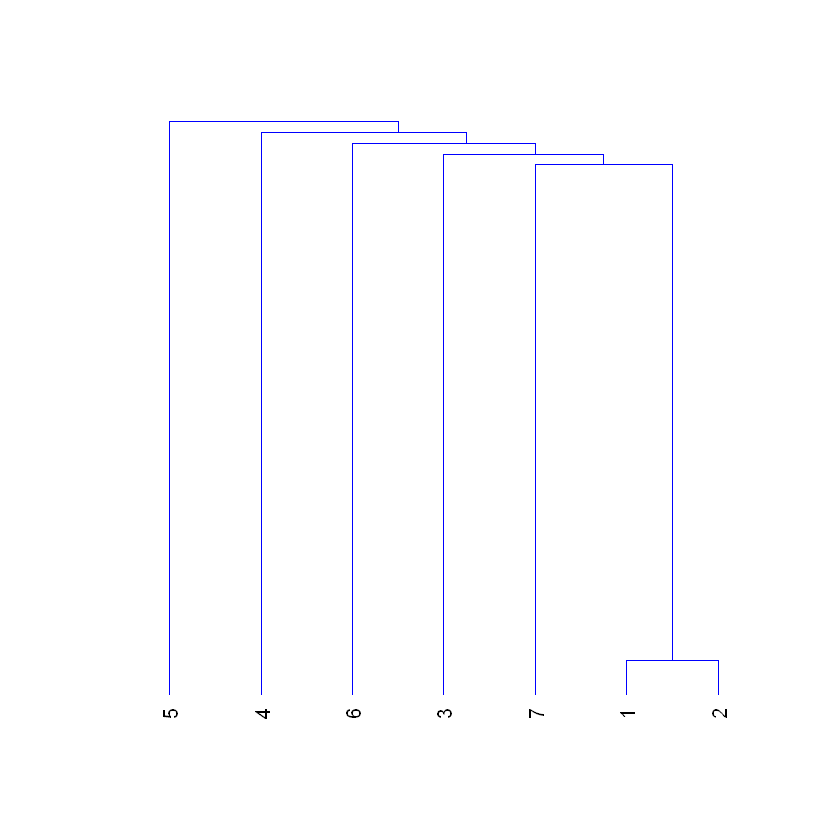

In [11]:
 
plot(hc,axes=FALSE)

In [13]:
#write out clusters
WriteOutClusterLabels(hc, 'clusters20datawithoutcluster.txt', verbose=TRUE)


[1] ---CLUSTER 1 ---
[1] 5
[1] ---CLUSTER 2 ---
[1] 4
[1] 6
[1] 3
[1] 7
[1] 1
[1] 2


## Actual Clustering should have been

### Cluster 1 (mean=100,sd=15)
1
2

### Cluster 2 (mean=100,sd=25)
3
4
5

### Cluster 3 (mean=100,sd=42)
6

### Cluster 4 (mean=100,sd=50)
7

## Case 2 with class

In [14]:
# if we give the class variable along with the data

file='C:/Users/pavle/Downloads/BHCDATA/20datawithclass.csv'

In [15]:
parser = ArgumentParser()
parser$add_argument('file', nargs=1, help='CSV with gene expression, first column gene names, first row time points')
parser$add_argument('--Pool', dest='pool', type='integer', default=0, help='Number of threads for BHC parallelisation. Default: 0 (automatic parallelisation)')
parser$add_argument('--Mode', dest='mode', default='multinomial', help='Mode of operation (multinomial/time-course). Default: multinomial')
parser$add_argument('--MakeHeatmap', dest='heatmap', action='store_true', help='Flag. If specified, a heatmap of the resulting clustering will be produced')
args = parser$parse_args(file)

In [16]:
#toy around with pool
if (args$pool==0)
{
	args$pool = detectCores()
}

In [17]:
#basic data prep
data = read.csv(args$file,header=TRUE,row.names=1,check.names=FALSE)
genes = rownames(data)
samples = colnames(data)
data = data.matrix(data)
#standardise data
standardisedData = (data-mean(data))/sd(data)

In [18]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V12,V13,V14,V15,V16,V17,V18,V19,V20,class
1,92.47,101.97,98.82,113.30,101.75,104.78,91.27,110.72,87.62,94.60,⋯,101.44,96.98,111.10,101.85,99.56,94.17,107.66,86.29,134.65,1
2,93.43,111.46,103.93,111.60,87.78,93.42,89.20,103.46,82.63,103.71,⋯,126.36,97.93,98.33,89.65,96.67,102.74,106.26,115.98,114.55,1
3,97.46,135.08,55.58,115.57,86.94,133.06,90.91,132.98,101.09,53.03,⋯,56.54,104.47,147.44,43.20,124.51,65.03,145.62,134.53,79.03,2
4,93.45,98.28,90.53,164.55,103.25,82.17,115.95,105.04,98.25,97.69,⋯,73.39,70.94,141.21,48.45,100.32,72.81,106.76,125.21,48.14,2
5,122.42,98.75,66.37,51.72,117.74,96.05,105.41,120.43,143.18,97.41,⋯,135.71,77.68,71.06,86.74,161.14,79.19,110.34,70.53,70.65,2
6,86.02,157.25,80.30,135.40,38.76,83.19,67.39,84.49,152.08,95.49,⋯,110.69,74.19,39.97,86.10,105.39,142.76,89.27,87.29,167.84,3
7,61.31,121.20,70.80,120.75,22.74,74.06,86.01,150.37,76.52,114.89,⋯,57.48,134.45,76.99,167.41,122.15,92.45,122.78,97.99,122.81,4


In [19]:
#BHC runs proper
if (args$mode == 'multinomial')
{
	#data discretisation
	percentiles = FindOptimalBinning(data, genes, transposeData=TRUE, verbose=TRUE)
	discreteData = DiscretiseData(t(data), percentiles=percentiles)
	discreteData = t(discreteData)
	hc = bhc(discreteData, genes, dataType=args$mode, numThreads=args$pool, verbose=TRUE)
	if (args$heatmap)
	{
		#cluster samples too, for the heatmap
		percentiles2 = FindOptimalBinning(data, genes, transposeData=FALSE, verbose=TRUE)
		discreteData2 = DiscretiseData(data, percentiles=percentiles2)
		discreteData2 = t(discreteData2)
		hc2 = bhc(discreteData2, samples, dataType='multinomial', numThreads=args$pool, verbose=TRUE)
		png('heatmap.png',width=8,height=6,units='in',res=300,family='mono')
		holder = par()
		rowmar = max(nchar(genes))*(0.2+1/(log10(length(genes))))*holder$cra[1]/holder$cra[2] * 3/4
		colmar = max(nchar(samples))*(0.2+1/(log10(length(samples))))*holder$cra[1]/holder$cra[2] * 2/3
		heatmap.2(standardisedData, Colv=hc2, Rowv=hc, tracecol=NA, scale="none", col=brewer.pal(11,'RdBu'), margins=1.5+c(colmar,rowmar))
		dev.off()
	}
} else {
	#get them time points as time points
	samples2 = as.numeric(samples)
	#clustering proper
	hc = bhc(standardisedData, genes, timePoints=samples2, dataType=args$mode, numThreads=args$pool, verbose=TRUE)
	if (args$heatmap)
	{
		png('heatmap.png',width=8,height=6,units='in',res=300,family='mono')
		holder = par()
		rowmar = max(nchar(genes))*(0.2+1/(log10(length(genes))))*holder$cra[1]/holder$cra[2] * 3/4
		colmar = max(nchar(samples))*(0.2+1/(log10(length(samples))))*holder$cra[1]/holder$cra[2] * 2/3
		heatmap.2(standardisedData, Colv=NA, Rowv=hc, tracecol=NA, scale="none", col=brewer.pal(11,'RdBu'), margins=1.5+c(colmar,rowmar))
		dev.off()
	}
}




DATA DISCRETISATION
-------------------
Percentiles: 0.1 0.8 0.1 
We have the following parameters for the data array:
nGenes:       7
nExperiments: 21
***Please check that these are the right way round! (it affects the discretisation)***

Discretisation logEvidence: -591.808730152954
(Need to add this to the model logEvidence)
-------------------
[1] Running Bayesian Hierarchical Clustering....
[1] "DataType: multinomial"
[1] Optimising global hyperparameter...
[1] 782.57541 -92.56199
[1] 1265.92459  -92.52258
[1] 1564.65082  -92.51038
[1] 1808.10036  -92.50341
[1] 1715.11091  -92.50584
[1] 1899.73387  -92.50125
[1] 1956.36649  -92.50001
[1] 1991.36738  -92.49928
[1] 2012.99911  -92.49885
[1] 2026.36826  -92.49858
[1] 2034.63085  -92.49842
[1] 2039.73741  -92.49832
[1] 2042.89344  -92.49826
[1] 2044.84397  -92.49822
[1] 2046.0495  -92.4982
[1] 2046.79450  -92.49818
[1] 2047.25496  -92.49817
[1] 2047.58833  -92.49817
[1] 2047.58833  -92.49817
[1] 2047.58833  -92.49817
[1] Hyperparamet

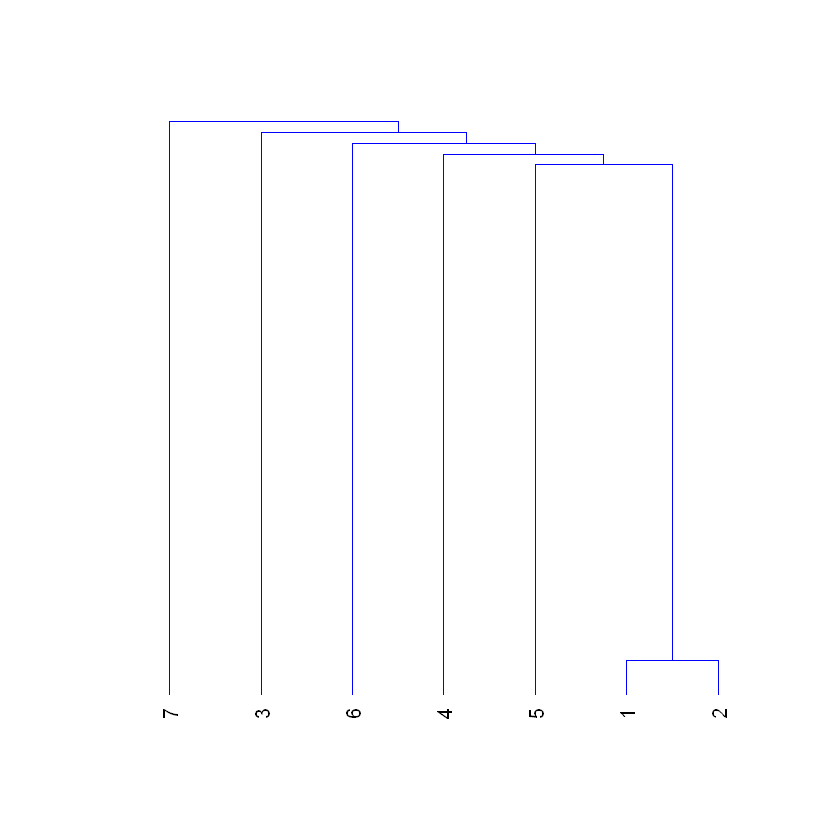

In [21]:
#Dendogram plot
plot(hc, axes=FALSE)

In [22]:
#write out clusters
WriteOutClusterLabels(hc, '20withclass.txt', verbose=TRUE)

[1] ---CLUSTER 1 ---
[1] 7
[1] ---CLUSTER 2 ---
[1] 3
[1] 6
[1] 4
[1] 5
[1] 1
[1] 2


## Case 3


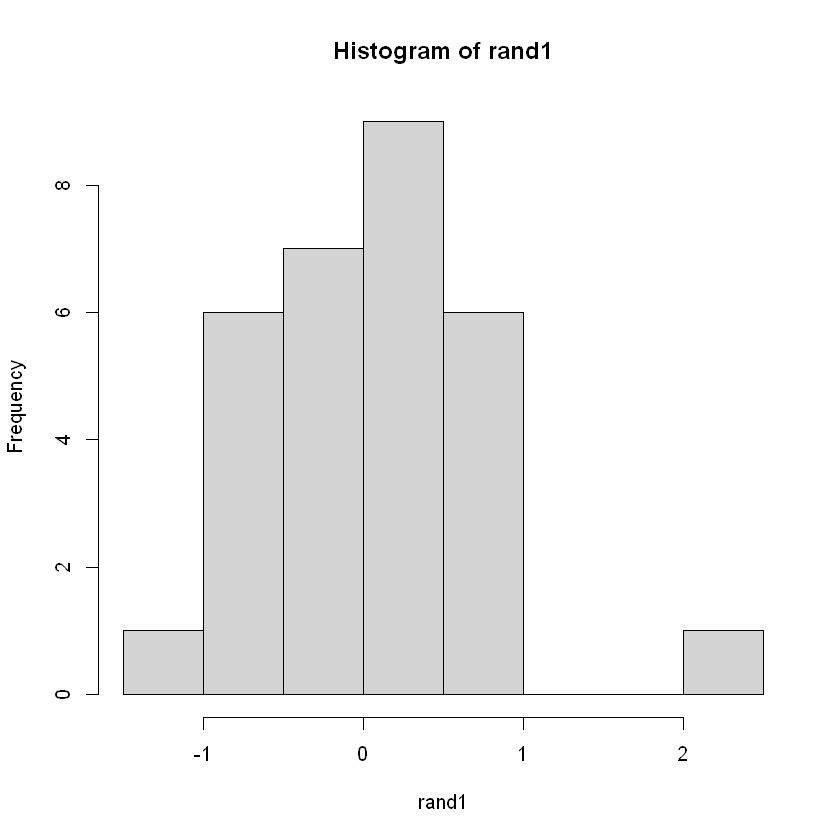

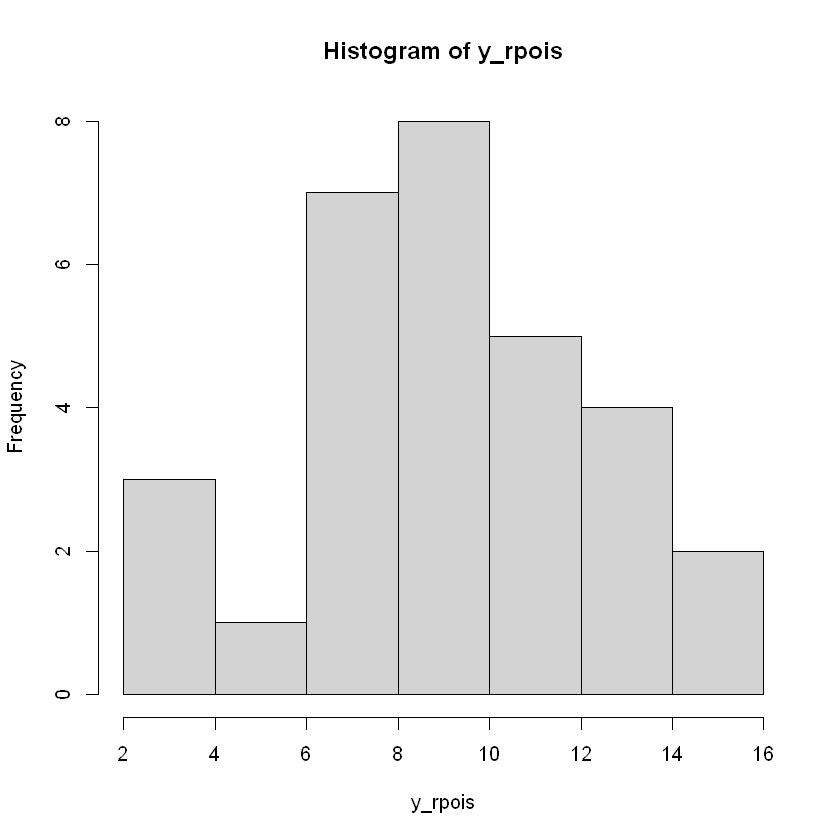

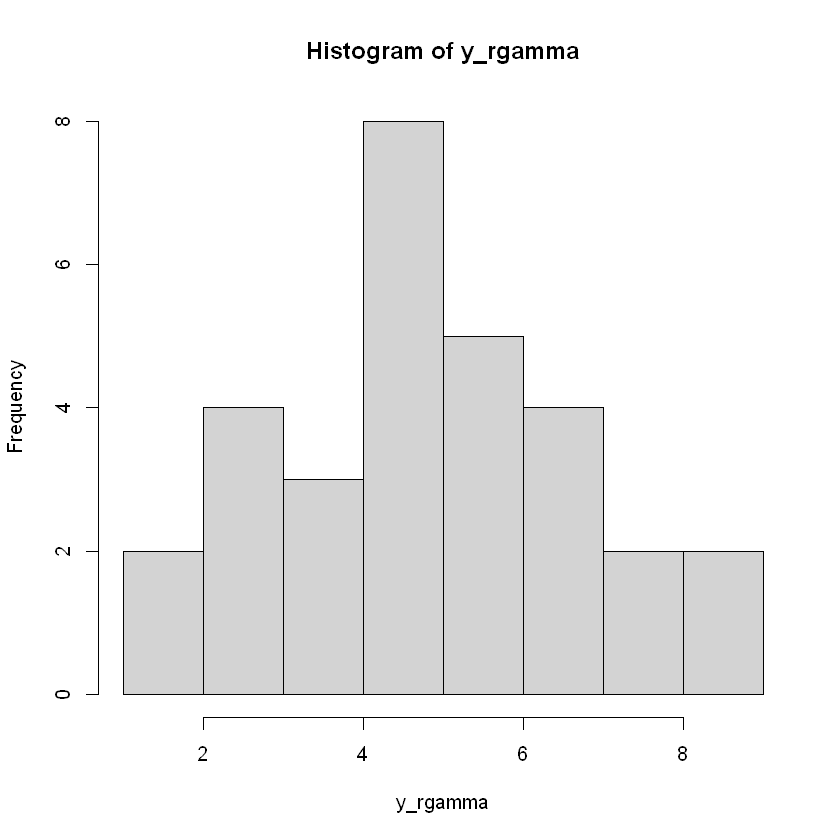

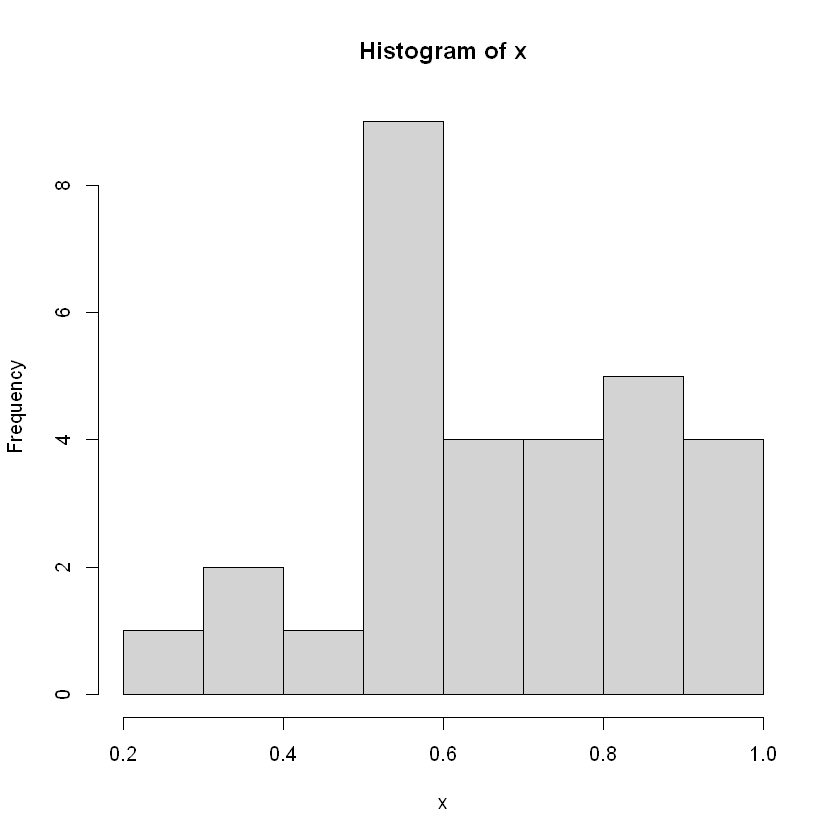

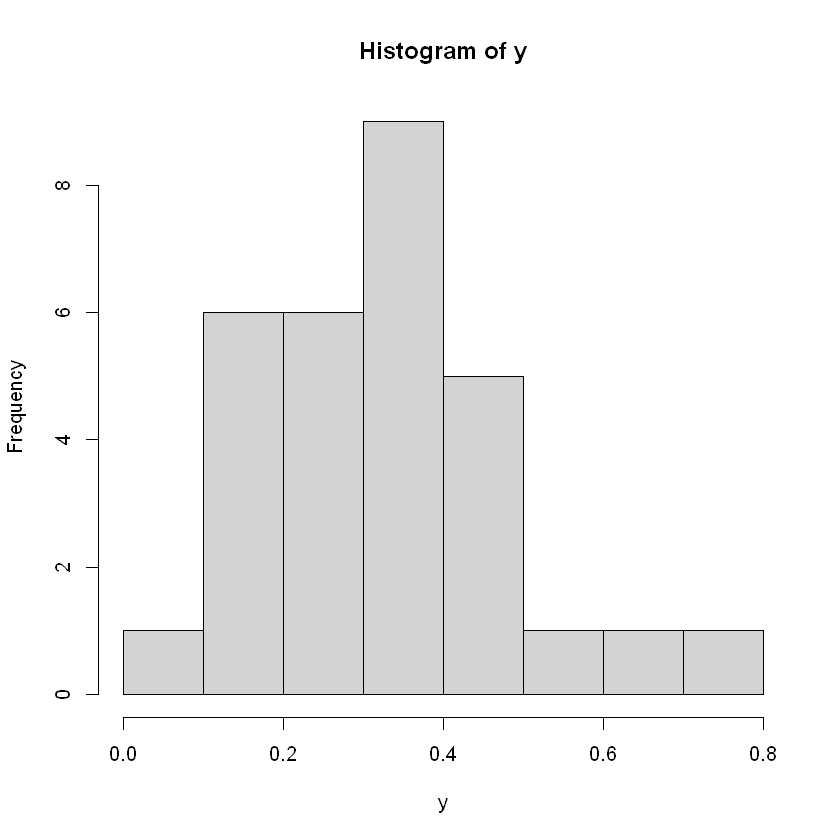

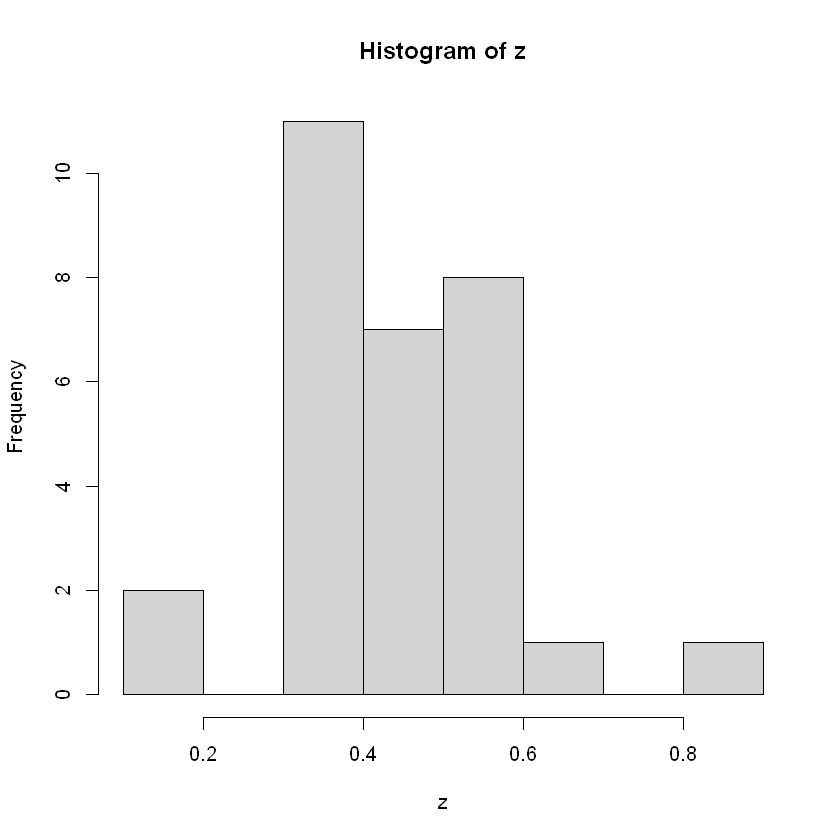

In [31]:
set.seed(100)
N<-30

#normal distribution
rand1 <- rnorm(N)
hist(rand1)

#poisson distribution
y_rpois <- rpois(N, lambda = 10) 
hist(y_rpois)

#gamma distribution
y_rgamma <- rgamma(N, shape = 5)                     # Draw N gamma distributed values

hist(y_rgamma)

#beta distributions
x<-rbeta(N,5,2)
hist (x)
y<-rbeta(N,2,5)
hist(y)
z<-rbeta(N,5,5)
hist(z)


In [23]:
file='C:/Users/pavle/Downloads/BHCDATA/simluated.csv'

In [24]:
parser = ArgumentParser()
parser$add_argument('file', nargs=1, help='CSV with gene expression, first column gene names, first row time points')
parser$add_argument('--Pool', dest='pool', type='integer', default=0, help='Number of threads for BHC parallelisation. Default: 0 (automatic parallelisation)')
parser$add_argument('--Mode', dest='mode', default='multinomial', help='Mode of operation (multinomial/time-course). Default: multinomial')
parser$add_argument('--MakeHeatmap', dest='heatmap', action='store_true', help='Flag. If specified, a heatmap of the resulting clustering will be produced')
args = parser$parse_args(file)

In [25]:
#basic data prep
data = read.csv(args$file,header=TRUE,row.names=1,check.names=FALSE)
genes = rownames(data)
samples = colnames(data)
data = data.matrix(data)
#standardise data
standardisedData = (data-mean(data))/sd(data)

In [26]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
rand1,-0.5021924,0.1315312,-0.07891709,0.8867848,0.1169713,0.3186301,-0.5817907,0.7145327,-0.8252594,-0.3598621,⋯,-0.4380900,0.7640606,0.2619613,0.7734046,-0.8143791,-0.4384506,-0.7202216,0.2309445,-1.1577295,0.2470760
y_rpois,9.0000000,15.0000000,9.00000000,9.0000000,7.0000000,8.0000000,15.0000000,11.0000000,12.0000000,5.0000000,⋯,11.0000000,11.0000000,10.0000000,12.0000000,7.0000000,14.0000000,7.0000000,9.0000000,10.0000000,3.0000000
y_rgamma,4.7796340,3.1145468,4.48571959,4.3529059,5.2314672,2.0784943,2.3719409,4.7031038,5.0921988,6.8934933,⋯,5.5136552,3.7096622,3.4453749,4.1705852,5.4199577,2.3469590,6.3595590,8.8570599,6.6842813,7.3067716
x,0.6536995,0.7525812,0.55705195,0.8123222,0.6412971,0.5632944,0.9504264,0.7442793,0.2833169,0.6243705,⋯,0.9463980,0.8179849,0.7758429,0.4635362,0.8891004,0.5224147,0.3811070,0.5197959,0.3707031,0.9153456
y,0.4374672,0.1014140,0.42689374,0.1306686,0.1743119,0.1496871,0.2264562,0.3896306,0.7131481,0.2025786,⋯,0.3501941,0.4725525,0.4574779,0.2911730,0.2938397,0.6297320,0.1320615,0.3055619,0.2260343,0.1490734
z,0.5634038,0.4725259,0.38295781,0.3288218,0.8021297,0.6210680,0.3304723,0.3262444,0.3409813,0.3726313,⋯,0.3881901,0.3480736,0.5125270,0.5332741,0.5688443,0.4221910,0.4460058,0.5051507,0.3737856,0.4049574


In [27]:
#BHC runs proper
if (args$mode == 'multinomial')
{
	#data discretisation
	percentiles = FindOptimalBinning(data, genes, transposeData=TRUE, verbose=TRUE)
	discreteData = DiscretiseData(t(data), percentiles=percentiles)
	discreteData = t(discreteData)
	hc = bhc(discreteData, genes, dataType=args$mode, numThreads=args$pool, verbose=TRUE)
	if (args$heatmap)
	{
		#cluster samples too, for the heatmap
		percentiles2 = FindOptimalBinning(data, genes, transposeData=FALSE, verbose=TRUE)
		discreteData2 = DiscretiseData(data, percentiles=percentiles2)
		discreteData2 = t(discreteData2)
		hc2 = bhc(discreteData2, samples, dataType='multinomial', numThreads=args$pool, verbose=TRUE)
		png('heatmap.png',width=8,height=6,units='in',res=300,family='mono')
		holder = par()
		rowmar = max(nchar(genes))*(0.2+1/(log10(length(genes))))*holder$cra[1]/holder$cra[2] * 3/4
		colmar = max(nchar(samples))*(0.2+1/(log10(length(samples))))*holder$cra[1]/holder$cra[2] * 2/3
		heatmap.2(standardisedData, Colv=hc2, Rowv=hc, tracecol=NA, scale="none", col=brewer.pal(11,'RdBu'), margins=1.5+c(colmar,rowmar))
		dev.off()
	}
} else {
	#get them time points as time points
	samples2 = as.numeric(samples)
	#clustering proper
	hc = bhc(standardisedData, genes, timePoints=samples2, dataType=args$mode, numThreads=args$pool, verbose=TRUE)
	if (args$heatmap)
	{
		png('heatmap.png',width=8,height=6,units='in',res=300,family='mono')
		holder = par()
		rowmar = max(nchar(genes))*(0.2+1/(log10(length(genes))))*holder$cra[1]/holder$cra[2] * 3/4
		colmar = max(nchar(samples))*(0.2+1/(log10(length(samples))))*holder$cra[1]/holder$cra[2] * 2/3
		heatmap.2(standardisedData, Colv=NA, Rowv=hc, tracecol=NA, scale="none", col=brewer.pal(11,'RdBu'), margins=1.5+c(colmar,rowmar))
		dev.off()
	}
}




DATA DISCRETISATION
-------------------
Percentiles: 0.1 0.8 0.1 
We have the following parameters for the data array:
nGenes:       6
nExperiments: 30
***Please check that these are the right way round! (it affects the discretisation)***

Discretisation logEvidence: 6.09994961954268
(Need to add this to the model logEvidence)
-------------------
[1] Running Bayesian Hierarchical Clustering....
[1] "DataType: multinomial"
[1] Optimising global hyperparameter...
[1]  782.5754 -120.9262
[1] 1265.9246 -120.8674
[1] 1564.6508 -120.8491
[1] 1810.5921 -120.8386
[1] 1716.6509 -120.8422
[1] 1901.2739 -120.8354
[1] 1957.3183 -120.8335
[1] 1991.9556 -120.8325
[1] 2013.3627 -120.8318
[1] 2026.5929 -120.8314
[1] 2034.7697 -120.8312
[1] 2039.823 -120.831
[1] 2042.9465 -120.8309
[1] 2044.8768 -120.8309
[1] 2046.0697 -120.8308
[1] 2046.8070 -120.8308
[1] 2047.2627 -120.8308
[1] 2047.5961 -120.8308
[1] 2047.5961 -120.8308
[1] 2047.5961 -120.8308
[1] Hyperparameter: 2047.59606525246
[1] Lower bound on

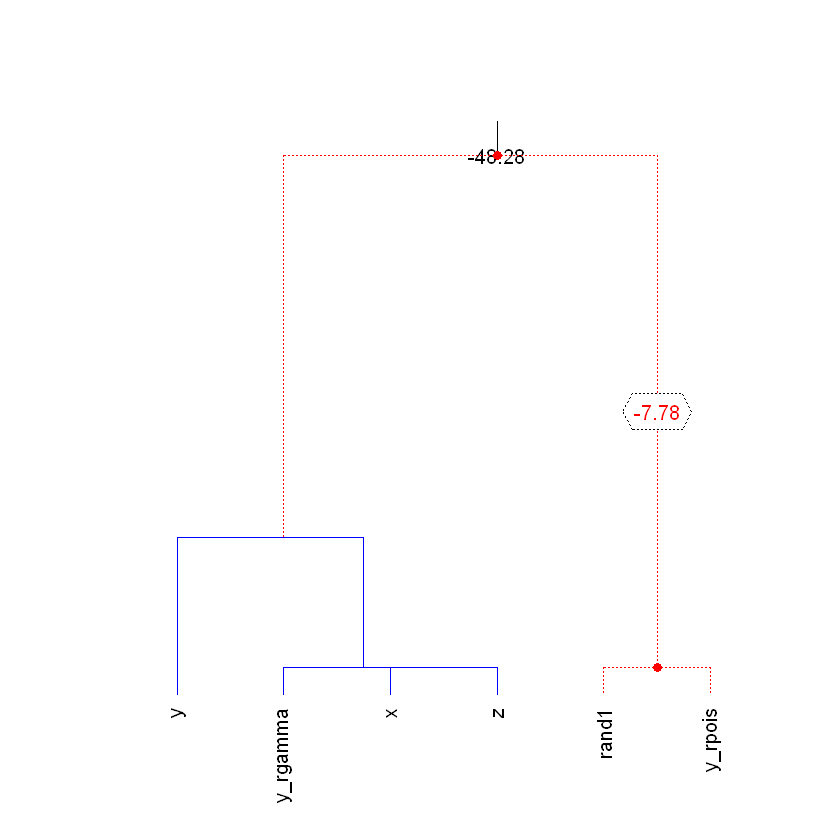

In [28]:
#Dendogram plot
plot(hc, axes=FALSE)

In [29]:
#write out clusters
WriteOutClusterLabels(hc, 'clusters.txt', verbose=TRUE)

[1] ---CLUSTER 1 ---
[1] y
[1] y_rgamma
[1] x
[1] z
[1] ---CLUSTER 2 ---
[1] rand1
[1] ---CLUSTER 3 ---
[1] y_rpois


## Actual clustering

### Cluster 1:
rand1

### Cluster 2:
y_pois

### Cluster 3:
y_gamma

### Cluster 4:
x, y and z should be separate as they are beta distributions with different parameters



## Conclusions

###  How strongly does the algorithm clustering adhere to the hypothesis that the data coming from the distribution model with same parameters should be in similar cluster

### Why has the model performed when we have taken different distributions altogether? Why has it placed the beta distributions in one cluster although within the same distribution, parameters were different?



### Why the alogrithm crashes when we take individual points and not as time series of points coming from a distribution?

### Could more features or data points in one row could be helpful in clear clustering

### Does giving class names as having some ordinal property affect the result in any way if we also add cluster class as one of the features